In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

contains 60000 samples of number pictures that are 28x28 that we will train the model on

In [4]:
X_train.shape

(60000, 28, 28)

labels indicating what digit is contained in the 60000 training images

In [6]:
y_train.shape

(60000,)

first dozen labels:

In [8]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

so this tells us that:
  first handwritten digit in the training set (X_train[0]) is 5
  second handwritten digit in the training set (X_train[1]) is 0
  third handwritten digit in the training set (X_train[2]) is 4
  ...

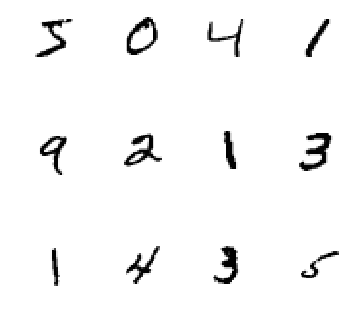

In [36]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3,4,k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

validation data

In [37]:
(X_valid.shape, y_valid.shape)

((10000, 28, 28), (10000,))

labeled validation data

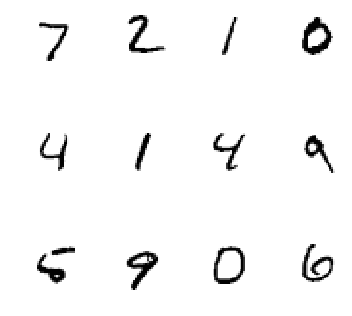

In [40]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3,4,k+1)
    plt.imshow(X_valid[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [45]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [46]:
y_valid[0]

7

flatten the 60000 2D arrays to a 1D array of 784 elements each

In [49]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

normalize the data

In [50]:
X_train /= 255
X_valid /= 255

In [51]:
X_valid[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

convert the labels into 1-hot

In [52]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

there are 10 possible digits so set n_classes to 10
to_categorical transforms the training and validation labels from integers to 1-hot form

In [53]:
y_valid[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.], dtype=float32)

In [60]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [62]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [63]:
model.fit(X_train, y_train,
          batch_size=128, epochs=200,
          verbose=1,
          validation_data=(X_valid, y_valid))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 1s 17us/step - loss: 0.0916 - acc: 0.1086 - val_loss: 0.0911 - val_acc: 0.1151
Epoch 2/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0909 - acc: 0.1207 - val_loss: 0.0905 - val_acc: 0.1332
Epoch 3/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0904 - acc: 0.1472 - val_loss: 0.0900 - val_acc: 0.1736
Epoch 4/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0899 - acc: 0.1897 - val_loss: 0.0896 - val_acc: 0.2136
Epoch 5/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0895 - acc: 0.2251 - val_loss: 0.0892 - val_acc: 0.2429
Epoch 6/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0891 - acc: 0.2464 - val_loss: 0.0889 - val_acc: 0.2640
Epoch 7/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0888 - acc: 0.2659 - val_loss: 0.0885 - 

60000/60000 [==============================] - 1s 16us/step - loss: 0.0658 - acc: 0.5604 - val_loss: 0.0652 - val_acc: 0.5640
Epoch 60/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0654 - acc: 0.5660 - val_loss: 0.0647 - val_acc: 0.5683
Epoch 61/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0649 - acc: 0.5713 - val_loss: 0.0643 - val_acc: 0.5736
Epoch 62/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0645 - acc: 0.5759 - val_loss: 0.0638 - val_acc: 0.5785
Epoch 63/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0640 - acc: 0.5808 - val_loss: 0.0634 - val_acc: 0.5844
Epoch 64/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0636 - acc: 0.5861 - val_loss: 0.0629 - val_acc: 0.5906
Epoch 65/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0631 - acc: 0.5908 - val_loss: 0.0625 - val_acc: 0.5951
Epoch 66/200
60000/60000 [==============

Epoch 118/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0445 - acc: 0.7433 - val_loss: 0.0436 - val_acc: 0.7544
Epoch 119/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0442 - acc: 0.7451 - val_loss: 0.0433 - val_acc: 0.7563
Epoch 120/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0439 - acc: 0.7468 - val_loss: 0.0430 - val_acc: 0.7580
Epoch 121/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0437 - acc: 0.7488 - val_loss: 0.0428 - val_acc: 0.7602
Epoch 122/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0434 - acc: 0.7507 - val_loss: 0.0425 - val_acc: 0.7617
Epoch 123/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0431 - acc: 0.7528 - val_loss: 0.0422 - val_acc: 0.7631
Epoch 124/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0429 - acc: 0.7547 - val_loss: 0.0420 - val_acc: 0.7658
Epoch 125/200
60000/

60000/60000 [==============================] - 1s 16us/step - loss: 0.0324 - acc: 0.8385 - val_loss: 0.0313 - val_acc: 0.8484
Epoch 177/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0322 - acc: 0.8392 - val_loss: 0.0312 - val_acc: 0.8492
Epoch 178/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0321 - acc: 0.8401 - val_loss: 0.0310 - val_acc: 0.8499
Epoch 179/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0319 - acc: 0.8408 - val_loss: 0.0309 - val_acc: 0.8507
Epoch 180/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0318 - acc: 0.8416 - val_loss: 0.0307 - val_acc: 0.8515
Epoch 181/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0316 - acc: 0.8424 - val_loss: 0.0306 - val_acc: 0.8522
Epoch 182/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.0315 - acc: 0.8430 - val_loss: 0.0305 - val_acc: 0.8527
Epoch 183/200
60000/60000 [=======